In [8]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sub= pd.read_csv('resnet34_submission.csv')
class_map ={0:'A',1:'B',2:'C'}
sub['labels'] = sub['labels'].map(class_map)
sub['image_ids'] = sub['image_ids'].astype(int)

print(len(sub))
sub.head()

800


,image_ids,labels
0,6315,B
1,5625,A
2,1603,A
3,5491,B
4,4205,B


In [3]:
ground_truth=pd.read_csv('../AImongo_img/dev.csv')
ground_truth.columns = sub.columns
ground_truth['image_id'] = ground_truth.image_ids
ground_truth['image_ids'] = ground_truth['image_ids'].apply(lambda x:x[1:5])
ground_truth['image_ids'] = ground_truth['image_ids'].astype(int)

print(len(ground_truth))
ground_truth.head()

800


,image_ids,labels,image_id
0,27,B,00027.jpg
1,33,A,00033.jpg
2,47,B,00047.jpg
3,50,B,00050.jpg
4,51,C,00051.jpg


In [4]:
df = pd.merge(ground_truth, sub, how='inner', on='image_ids')
df.columns= ['image_ids','y_true', 'image_id', 'y_pred']

df.head(10)

,image_ids,y_true,image_id,y_pred
0,27,B,00027.jpg,B
1,33,A,00033.jpg,A
2,47,B,00047.jpg,B
3,50,B,00050.jpg,B
4,51,C,00051.jpg,C
5,52,B,00052.jpg,B
6,59,C,00059.jpg,C
7,60,A,00060.jpg,B
8,69,B,00069.jpg,A
9,70,A,00070.jpg,A


In [35]:
df_error = df[df.y_true != df.y_pred]
print('number of mis-classification: {}'.format(len(df_error)))
df_error.head()

number of mis-classification: 194


,image_ids,y_true,image_id,y_pred
7,60,A,00060.jpg,B
8,69,B,00069.jpg,A
12,82,C,00082.jpg,B
13,111,B,00111.jpg,A
14,119,C,00119.jpg,B


In [48]:
def annotate(y_true, y_pred):
    label_map = {'A':3, 'B':2, 'C':1}
    
    true_score = label_map[y_true]
    pred_score = label_map[y_pred]
    
    if true_score - pred_score > 0:
        return 'under-estimate'
    else:
        return 'over-estimate'

In [49]:
def print_mis_classified_mango(row=3, col=5, fig_size = (20, 16)):
    ind = 0
    fig, ax = plt.subplots(row, col, figsize=fig_size)
    for i, axi in enumerate(ax.flat):
        img_bgr =  cv2.imread('../AImongo_img/C1-P1_Dev/{}'.format(df_error.iloc[i, 2]))
        img = cv2.resize(img_bgr[:, :, [2, 1, 0]], (224, 224))

        y_true = df_error.iloc[i, 1]
        y_pred = df_error.iloc[i, 3]
        annotation = annotate(y_true, y_pred)
        
        axi.imshow(img)
        axi.set_title('y_true:{}, y_pred:{}, {}'.format(y_true, y_pred, annotation))
    plt.show()

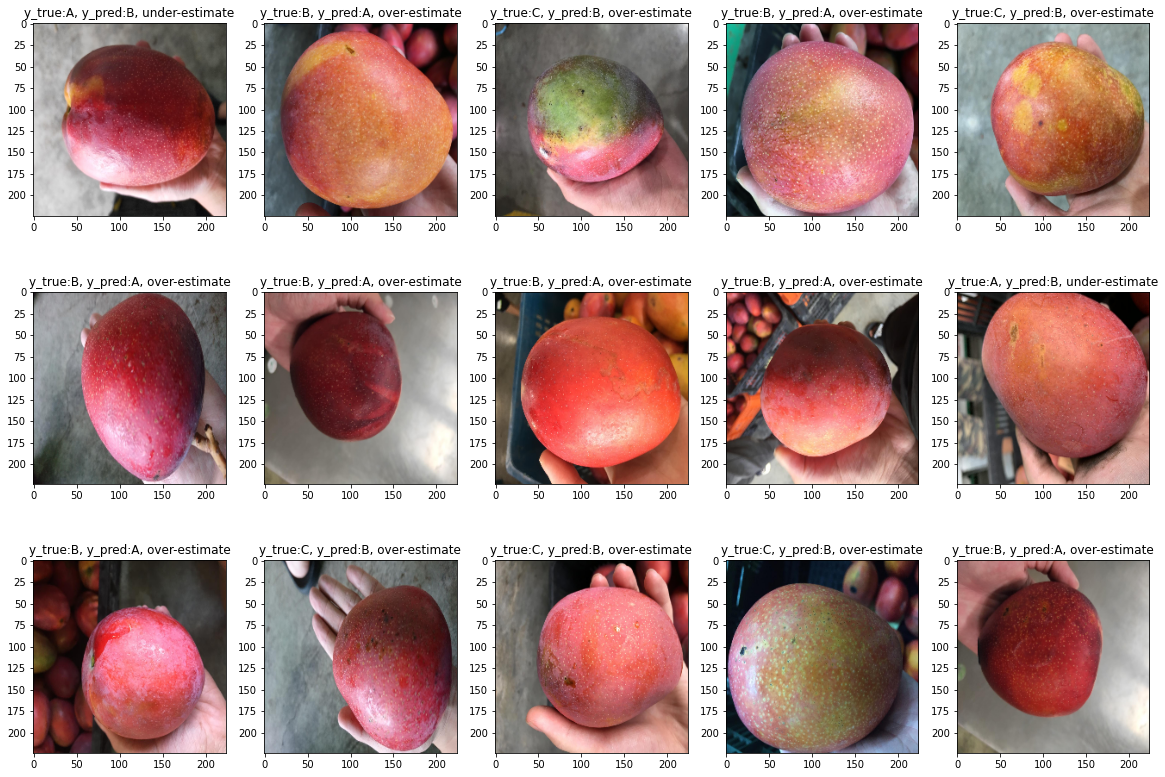

In [51]:
print_mis_classified_mango(3, 5, (20, 14))